Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score

In [2]:
df = pd.read_csv(r"C:\Users\khlds\OneDrive\Documents\Data Sets\Fraud Transaction\Final Transactions.csv")
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [4]:
df.isnull().sum()

Unnamed: 0           0
TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

0    1518186
1     235969
Name: TX_FRAUD, dtype: int64


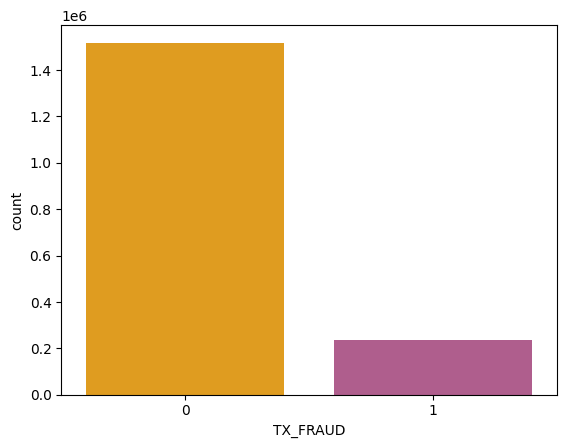

In [5]:
cols=["#ffa600","#bc5090"]
sns.countplot(x=df["TX_FRAUD"],palette=cols)
print(df["TX_FRAUD"].value_counts())

In [6]:
df = df.drop(df.index[0])

fraud = df[df['TX_FRAUD'] == 1]

non_fraud = df[df['TX_FRAUD'] == 0]

n_non_fraud = len(non_fraud)

fraud_upsampled = fraud.sample(n_non_fraud, replace=True)

df_upsampled = pd.concat([fraud_upsampled, non_fraud])

df = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv(r"C:\Users\khlds\OneDrive\Documents\Data Sets\Fraud Transaction\cleaned_transactions.csv", index=False)

In [7]:
df = pd.read_csv(r"C:\Users\khlds\OneDrive\Documents\Data Sets\Fraud Transaction\cleaned_transactions.csv")

df_features = df.drop(['TRANSACTION_ID', 'TX_FRAUD','TX_DATETIME','Unnamed: 0','CUSTOMER_ID','TERMINAL_ID','TX_FRAUD_SCENARIO'], axis=1)

print(df_features.head())

   TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS
0     619.72         11867589           137
1     613.22          3542397            40
2     244.61           758284             8
3    1905.49         13749173           159
4    1155.68          5718041            66


In [8]:
scaler = StandardScaler()

standardized_features = scaler.fit_transform(df_features)

In [9]:
X = standardized_features
y = df["TX_FRAUD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy:",acc)

accuracy: 0.9965781508841149


In [ ]:
dt_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_test, y_test)

print("Best hyperparameters: ", grid_search.best_params_)

In [11]:
model = DecisionTreeClassifier(max_depth= None, min_samples_leaf=1,min_samples_split=2)
model.fit(X_train, y_train)

y_pred_DTC = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_DTC)
cm_DTC = confusion_matrix(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm_DTC)

Decision Tree Classifier:
Accuracy: 0.996573210774708
Confusion Matrix:
 [[301654   2029]
 [    52 303539]]


Text(0.5, 1.0, 'Confusion Matrix: Decision Tree Classifier')

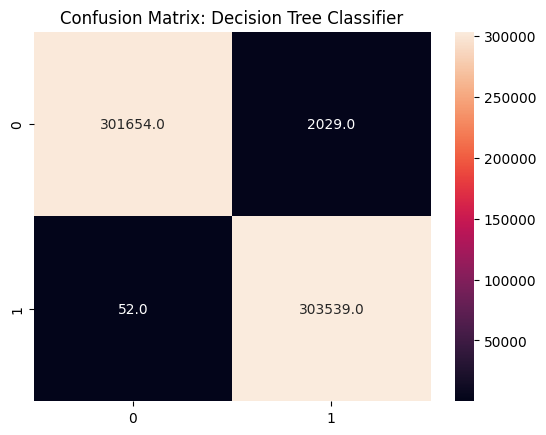

In [12]:
cm_sns_DTC = sns.heatmap(cm_DTC,annot=True,fmt='.1f')
cm_sns_DTC.set_title('Confusion Matrix: Decision Tree Classifier')

In [13]:
precision_DTC = precision_score(y_test, y_pred_DTC)
recall_DTC = recall_score(y_test, y_pred_DTC)
f1_DTC = f1_score(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Precision: ", precision_DTC)
print("Recall: ", recall_DTC)
print("F1-Score: ", f1_DTC)

Decision Tree Classifier:
Precision:  0.9933599067965232
Recall:  0.9998287169250736
F1-Score:  0.9965838147347409
